## Calculate national-level intersects of butterfly data

* Read in the butterfly data
* Read in national shapes
* Count intersecting points for a given national shape
* Create a simple data table, export as csv

In [61]:
import pandas as pd
import geopandas as gpd
import shapely
%matplotlib inline

In [62]:
df = pd.read_csv('../GBIF_data/output.csv')

In [63]:
df.head()

,decimallatitude,decimallongitude,date,year,species
0,50.97904,3.10683,2000-09-01,2000,3
1,50.84415,2.89347,2003-05-28,2003,3
2,51.11305,3.46429,2000-06-20,2000,3
3,51.11305,3.46429,2000-06-25,2000,3
4,51.11305,3.46429,2000-07-20,2000,3


In [64]:
def point_maker(lon, lat):
    return shapely.geometry.Point(lon, lat)

In [65]:
rows =[]
points = []
for val in df.values:
    lat, lon, date, year, species = val
    points.append(point_maker(lon,lat))
    rows.append([ date, year, species])

In [66]:
#test_point = shapely.geometry.Point(df['decimallongitude'][0],df['decimallatitude'][0])

In [67]:
#gpd.GeoDataFrame.

In [68]:
series = gpd.GeoDataFrame(rows, crs={'init': 'epsg:4326'}, geometry=points, columns=['date','year','species'])

In [69]:
series.head()

,date,year,species,geometry
0,2000-09-01,2000,3,POINT (3.10683 50.97904000000001)
1,2003-05-28,2003,3,POINT (2.89347 50.84415)
2,2000-06-20,2000,3,POINT (3.46429 51.11305)
3,2000-06-25,2000,3,POINT (3.46429 51.11305)
4,2000-07-20,2000,3,POINT (3.46429 51.11305)


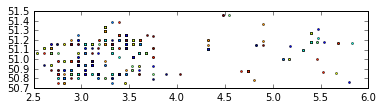

In [33]:
series[0:1000].plot()

In [70]:
nations = gpd.read_file('/home/jovyan/work/gadm28_adm0/gadm28_adm0.shp')

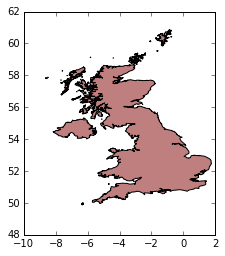

In [71]:
nations[nations.ISO == 'GBR'].plot()

In [72]:
#loci = uk.geometry.intersects(series.geometry)

In [73]:
uk = nations[nations.ISO == 'GBR']
uk

,ACP,AOSIS,ASEAN,Agadir,CACM,CAN,CARICOM,CEEAC,CEMAC,CEPLG,...,UNREGION2,VALIDFR,VALIDTO,WASPARTOF,WBDEBT,WBINCOME,WBOTHER,WBREGION,WWW,geometry
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None,(POLYGON ((-6.350417137145939 49.8990287780762...


In [74]:
from geopandas.tools import overlay

In [75]:
lx = series.intersection?

In [76]:
lx = series.geometry.intersects(uk)

series[lx]

,date,year,species,geometry


In [ ]:
print(uk.crs)
print(series.crs)

In [ ]:
#intersecting_points = gpd.overlay(uk, series.buffer(0.5), how='intersection')

In [97]:
from geopandas.tools import sjoin

In [99]:
%%time
inner_join = sjoin(series, uk, how="inner",op='intersects')


CPU times: user 1min 40s, sys: 770 ms, total: 1min 41s
Wall time: 1min 43s


In [93]:
inner_join.head()

,date,year,species,geometry,index_right,ACP,AOSIS,ASEAN,Agadir,CACM,...,UNREGION1,UNREGION2,VALIDFR,VALIDTO,WASPARTOF,WBDEBT,WBINCOME,WBOTHER,WBREGION,WWW
52640,2010-07-15,2010,3,POINT (-4.65683 55.58655),241,0.0,0.0,0.0,0.0,0.0,...,Northern Europe,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None
52641,2011-07-22,2011,3,POINT (-3.64131 55.89191999999999),241,0.0,0.0,0.0,0.0,0.0,...,Northern Europe,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None
52642,2013-08-02,2013,3,POINT (-3.64131 55.89191999999999),241,0.0,0.0,0.0,0.0,0.0,...,Northern Europe,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None
52643,2006-07-28,2006,3,POINT (-3.64131 55.89191999999999),241,0.0,0.0,0.0,0.0,0.0,...,Northern Europe,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None
52644,2000-09-16,2000,3,POINT (-3.58857 55.89261),241,0.0,0.0,0.0,0.0,0.0,...,Northern Europe,Europe,1927,Present,None,Debt not classified,High income: OECD,None,None,None


In [89]:
len(inner_join)

85664

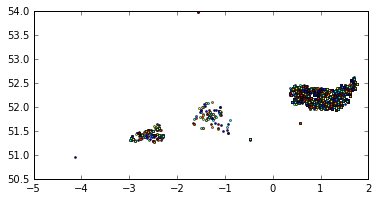

In [91]:
inner_join[1000:8000:].plot()

In [101]:
group= inner_join.groupby(['year', 'ISO', 'species'])

In [103]:
len(group)

93

In [106]:
group.count()

date  geometry  index_right   ACP  AOSIS  ASEAN  Agadir  \
year ISO species                                                            
1998 GBR 1         873       873          873   873    873    873     873   
         2        1201      1201         1201  1201   1201   1201    1201   
         3        1195      1195         1195  1195   1195   1195    1195   
         5         213       213          213   213    213    213     213   
         8           1         1            1     1      1      1       1   
1999 GBR 1         991       991          991   991    991    991     991   
         2        1448      1448         1448  1448   1448   1448    1448   
         3        1137      1137         1137  1137   1137   1137    1137   
         5         151       151          151   151    151    151     151   
         8           1         1            1     1      1      1       1   
2000 GBR 1        1042      1042         1042  1042   1042   1042    1042   
         2         865       865          865   865    865    865     865   
         3         894       894          894   894    894    894     894   
         5         538       538          538   538    538    538     538   
         8           1         1            1     1      1      1       1   
2001 GBR 1         806       806          806   806    806    806     806   
         2         546       546          546   546    546    546     546   
         3         855       855          855   855    855    855     855   
         5         148       148          148   148    148    148     148   
2002 GBR 1         633       633          633   633    633    633     633   
         2         496       496          496   496    496    496     496   
         3         874       874          874   874    874    874     874   
         5         389       389          389   389    389    389     389   
2003 GBR 1        1715      1715         1715  1715   1715   1715    1715   
         2         809       809          809   809    809    809     809   
         3        1536      1536         1536  1536   1536   1536    1536   
         5        1546      1546         1546  1546   1546   1546    1546   
         8           2         2            2     2      2      2       2   
2004 GBR 1         829       829          829   829    829    829     829   
         2        1168      1168         1168  1168   1168   1168    1168   
...                ...       ...          ...   ...    ...    ...     ...   
2011 GBR 2        1331      1331         1331  1331   1331   1331    1331   
         3        1459      1459         1459  1459   1459   1459    1459   
         5         157       157          157   157    157    157     157   
         8          15        15           15    15     15     15      15   
2012 GBR 1        1090      1090         1090  1090   1090   1090    1090   
         2         912       912          912   912    912    912     912   
         3         967       967          967   967    967    967     967   
         5         120       120          120   120    120    120     120   
         8           5         5            5     5      5      5       5   
2013 GBR 1         860       860          860   860    860    860     860   
         2        1379      1379         1379  1379   1379   1379    1379   
         3        2121      2121         2121  2121   2121   2121    2121   
         5         426       426          426   426    426    426     426   
         8           9         9            9     9      9      9       9   
2014 GBR 1        2503      2503         2503  2503   2503   2503    2503   
         2        1426      1426         1426  1426   1426   1426    1426   
         3        2301      2301         2301  2301   2301   2301    2301   
         4           6         6            6     6      6      6       6   
         5         380       380          380   380    380    380     380   
         8    